C:\Users\Admin\AppData\Local\Temp\ipykernel_5732\3756533983.py:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  country_df["date"] = pd.to_datetime(country_df["date"])


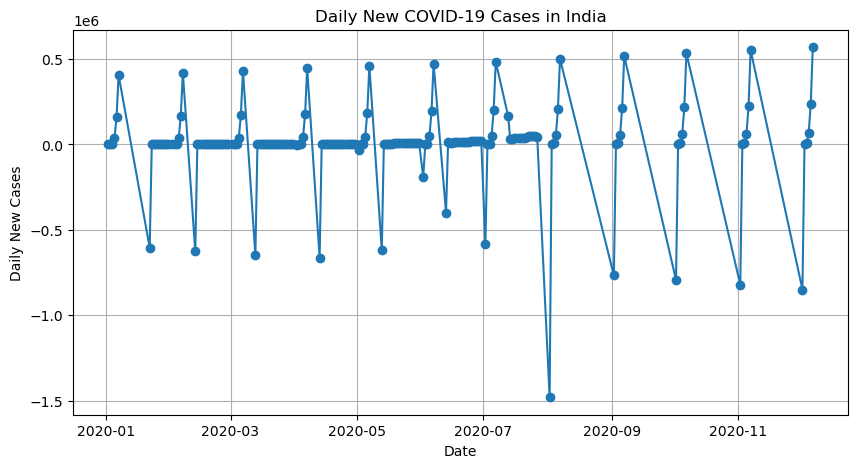

KeyError: 'fatalities'

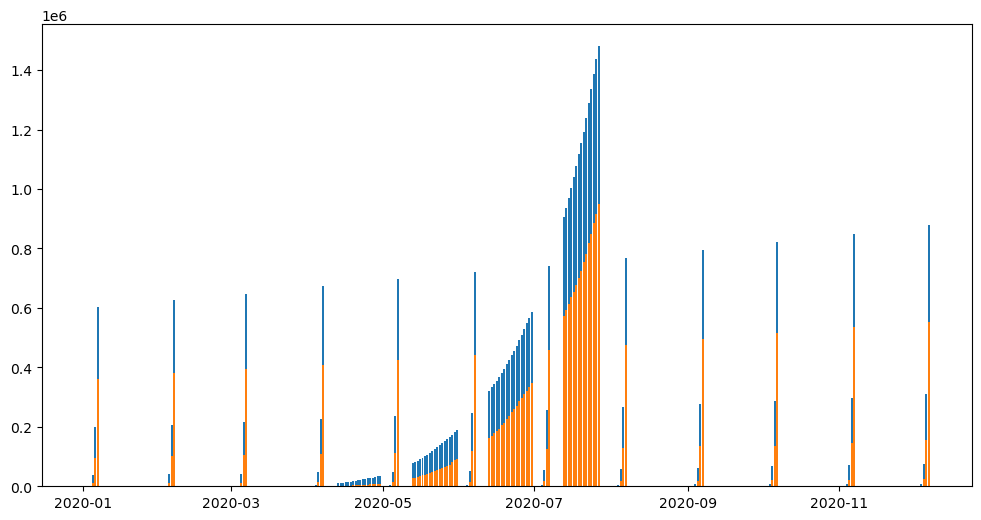

In [3]:


#prog - 8- dataset-2
import pandas as pd
import matplotlib.pyplot as plt

# =====================================================
# LOAD DATA (replace with your file's path)
# =====================================================
df = pd.read_csv("covid_19_clean_complete.csv")

# Standardize column names if needed
df.columns = [c.strip().lower().replace("/", "_").replace(" ", "_")
              for c in df.columns]

# Select country
country = "India"   # change to "USA" or "Brazil"

country_df = df[df["country_region"] == country].copy()

# Convert date column
country_df["date"] = pd.to_datetime(country_df["date"])

# Sort by date
country_df = country_df.sort_values("date")

# =====================================================
# 1(a). DAILY NEW CASES — LINE CHART
# =====================================================
country_df["daily_new_cases"] = country_df["confirmed"].diff().fillna(0)

plt.figure(figsize=(10,5))
plt.plot(country_df["date"], country_df["daily_new_cases"], marker='o')
plt.title(f"Daily New COVID-19 Cases in {country}")
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.grid(True)
plt.show()


# =====================================================
# 1(b). STACKED BAR — CONFIRMED / RECOVERED / FATALITIES
# =====================================================
plt.figure(figsize=(12,6))

plt.bar(country_df["date"], country_df["confirmed"], label="Confirmed")
plt.bar(country_df["date"], country_df["recovered"], label="Recovered")
plt.bar(country_df["date"], country_df["fatalities"], label="Fatalities")

plt.title(f"COVID-19 Cases Composition Over Time ({country})")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =====================================================
# 2. FUNNEL CHART — CASE PROGRESSION
# confirmed → active → recovered → fatalities
# =====================================================

# Latest numbers
latest = country_df.iloc[-1]
confirmed = latest["confirmed"]
recovered = latest["recovered"]
fatal = latest["fatalities"]
active = confirmed - recovered - fatal

stages = ["Confirmed", "Active", "Recovered", "Fatal"]
values = [confirmed, active, recovered, fatal]

plt.figure(figsize=(6,6))
plt.barh(stages, values)
plt.title(f"COVID-19 Funnel Chart — {country}")
plt.xlabel("Count")
plt.gca().invert_yaxis()  # Funnel-like effect
plt.tight_layout()
plt.show()
